In [37]:
import twosigmafunc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
%matplotlib inline

In [2]:
train, origin_features = twosigmafunc.preprocess()

In [23]:
etr_features = [
    'tec20-30',
    'technical_30',
    'technical_43',
    'technical_43_diff',
    'technical_11_diff',
    'technical_2_diff',
    'technical_11',
    'technical_20',
    'technical_2',
    'fundamental_25_nan',
    'technical_14_diff',
    'technical_21_diff',
    'technical_9_nan',
    'technical_40',
    'technical_30_diff',
    'technical_6_diff',
    'technical_6',
    'technical_17_diff',
    'technical_17',
    'technical_14',
    'technical_7',
    'technical_19',
    'technical_44_nan',
    'fundamental_27_nan',
    'technical_18_nan',
    'technical_28_nan',
    'technical_21',
    'technical_42_nan',
    'technical_29_diff',
    'technical_20_diff',
    'technical_31_nan',
    'fundamental_53',
    'technical_24_nan',
    'technical_36',
    'technical_19_diff',
    'technical_27',
    'technical_29',
    'technical_35',
    # 'technical_22',
    'technical_41_nan',
    'fundamental_8',
    'fundamental_21',
    'fundamental_17_nan',
    # 'technical_34',
    'technical_16_nan',
    'technical_27_diff',
    'fundamental_33_nan',
    'fundamental_58',
    'derived_1_nan',
    'technical_10',
    'technical_25_nan',
    'fundamental_18',
    'fundamental_59',
    'technical_40_diff',
    'null_count',
    'fundamental_5_nan',
    'fundamental_48',
    'fundamental_47_nan',
    'technical_36_diff',
    'fundamental_41_nan',
    'fundamental_42_nan',
    'fundamental_0_nan',
    'fundamental_50',
    'fundamental_40',
    'technical_3_nan',
    'fundamental_23',
    'fundamental_49_nan',
    'fundamental_36',
    'technical_44',
    'fundamental_2',
    'fundamental_0',
    'technical_41',
    'fundamental_62_diff',
    'technical_38_diff',
    'fundamental_22_nan',
    'technical_12',
    'fundamental_62',
    'technical_37_diff',
    'fundamental_44',
    'technical_29_nan',
    'fundamental_24_nan',
    'technical_10_nan',
    'fundamental_46',
    'technical_1',
    'fundamental_54_nan',
    'fundamental_0_diff',
    'technical_12_diff',
    'technical_35_diff',
    'derived_3_nan',
    # 'fundamental_63_nan',
    # 'fundamental_31_nan',
    # 'fundamental_40_nan',
    # 'fundamental_35_nan',
    # 'technical_3',
    # 'fundamental_13'
]

In [4]:

seed = 17
excl = twosigmafunc.excl_features()
origin_features = [c for c in train.columns if c not in excl]
# origin_features_exclude_y = [c for c in observation.train.columns if c not in ['y']]
to_add_diff = [feature[:-5] for feature in etr_features if feature.endswith('_diff')]
to_add_nan = [feature[:-4] for feature in etr_features if feature.endswith('_nan')]
diff_features = [feature + '_diff' for feature in to_add_diff]
linear_features = ['technical_20_diff', 'tec20-30']

In [5]:
twosigmafunc.add_diffs(train, to_add_diff, 1)

sucessfully add 20 diff features


In [6]:
twosigmafunc.add_nans(train, to_add_nan, 1)

sucessfully add 28 nan features


In [7]:
train = train.fillna(train.median())

In [9]:
train.isnull().sum().sort_values()

id                   0
technical_37         0
technical_38         0
technical_39         0
technical_40         0
technical_41         0
technical_42         0
technical_43         0
technical_36         0
technical_44         0
id_diff              0
technical_43_diff    0
technical_11_diff    0
technical_2_diff     0
technical_14_diff    0
technical_21_diff    0
technical_30_diff    0
y                    0
technical_6_diff     0
technical_35         0
technical_33         0
technical_14         0
technical_16         0
technical_17         0
technical_18         0
technical_19         0
technical_20         0
technical_21         0
technical_34         0
technical_22         0
                    ..
technical_1          0
technical_2          0
technical_3          0
technical_5          0
technical_6          0
technical_7          0
technical_9          0
technical_0          0
fundamental_54       0
fundamental_53       0
fundamental_52       0
fundamental_35       0
fundamental

In [10]:
train['tec20-30'] = train['technical_20'] - train['technical_30']

In [12]:
from sklearn.linear_model import Ridge

In [31]:
X_train, y_train, X_test, y_test = twosigmafunc.split_data(train, etr_features + ['timestamp'])

In [13]:
low_y_cut = -0.075
high_y_cut = 0.075
y_is_above_cut = (y_train > high_y_cut)
y_is_below_cut = (y_train < low_y_cut)
y_is_within_cut = (~y_is_above_cut & ~y_is_below_cut)

In [14]:
ridge = Ridge()
ridge.fit(X_train.loc[y_is_within_cut, ['tec20-30', 'technical_20_diff']], y_train[y_is_within_cut])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
pred = ridge.predict(X_test[['tec20-30', 'technical_20_diff']]).clip(low_y_cut, high_y_cut)

In [16]:
twosigmafunc.R_score(pred, y_test)

0.02648156394967555

In [17]:
X_train['r'] = np.abs(ridge.predict(X_train[['tec20-30', 'technical_20_diff']]).clip(low_y_cut, high_y_cut) - y_train)

In [18]:
X_train.head()

,t22_0.0,t22_0.5,t34_0.0,t34_0.5,y_lr1,y_lr2,y_past,tec20-30,technical_30,tec123,...,fundamental_24_nan,technical_10_nan,fundamental_46,technical_1,fundamental_54_nan,fundamental_0_diff,technical_12_diff,technical_35_diff,derived_3_nan,r
131062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1,1,0.020412,-0.000483,1,0.0,0.000000e+00,0.0,1,0.007212
131895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1,1,0.020412,-0.000483,1,0.0,9.741791e-11,0.0,1,0.001846
132728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,1,1,0.020412,-0.000483,1,0.0,9.741791e-11,0.0,1,0.017620
133561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0,0,-0.032304,-0.000483,0,0.0,9.741791e-11,0.0,0,0.012831
134393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,...,0,0,-0.032304,-0.000483,0,0.0,0.000000e+00,0.0,0,0.025333


In [19]:
high_r = X_train.r.quantile(0.5)

In [20]:
high_r

0.009420854435285494

In [25]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_jobs=-1, n_estimators=128, random_state=seed, max_depth=5, max_features=0.6)
etr.fit(X_train.loc[X_train.r > high_r, etr_features], y_train[X_train.r > high_r])

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=5,
          max_features=0.6, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=128, n_jobs=-1,
          oob_score=False, random_state=17, verbose=0, warm_start=False)

In [42]:
ridge_bad = Ridge()
ridge_bad.fit(X_train.loc[X_train.r > high_r, ['tec20-30', 'technical_20_diff']], y_train[X_train.r > high_r])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [27]:
pred = etr.predict(X_test[etr_features]).clip(low_y_cut, high_y_cut)

In [28]:
y_pred = ridge.predict(X_test[['tec20-30', 'technical_20_diff']]).clip(low_y_cut, high_y_cut)

In [29]:
twosigmafunc.R_score(pred, y_test)

0.01265528041427667

In [32]:
min_stamp = X_test.timestamp.min()
max_stamp = X_test.timestamp.max()

In [33]:
X_test['y_pred'] = y_pred
X_test['y_bad'] = pred
stamp = min_stamp
y_true_acc = []
y_pred_acc = []
reward_ri = []
reward_bad = []
reward_com = []
while stamp <= max_stamp:        
    y_true = y_test.loc[X_test.timestamp <= stamp]
    y_ri = X_test.y_pred.loc[X_test.timestamp <= stamp]
    y_bad = X_test.y_bad.loc[X_test.timestamp <= stamp]
    y_com = 0.7 * y_ri + 0.3 * y_bad
#         print(y_true.shape, y_pred.shape)
    reward_ri.append(twosigmafunc.R_score(np.array(y_ri), np.array(y_true)))
    reward_bad.append(twosigmafunc.R_score(np.array(y_bad), np.array(y_true)))
    reward_com.append(twosigmafunc.R_score(np.array(y_com), np.array(y_true)))
    stamp += 1
    if stamp % 100 == 0:
        print(stamp, 'ridge:', reward_ri[-1], 'bad:', reward_bad[-1], 'combine:', reward_com[-1])

1000 ridge: -0.00552716746113 bad: -0.0203759937889 combine: 0.0118511580754
1100 ridge: 0.0117636443537 bad: -0.0350548933463 combine: -0.00229231794399
1200 ridge: 0.0195745805043 bad: -0.0333909619403 combine: 0.0144482667558
1300 ridge: 0.0155557697507 bad: -0.0325028548145 combine: 0.0120162202315
1400 ridge: -0.0124457922406 bad: -0.0367569119258 combine: -0.016174904885
1500 ridge: 0.00875705333811 bad: -0.0267987545045 combine: 0.00814992434783
1600 ridge: 0.0286685088215 bad: 0.0106438169174 combine: 0.0279543850855
1700 ridge: 0.0293695188969 bad: 0.0138399542834 combine: 0.0286995444938
1800 ridge: 0.0270153585809 bad: 0.0116096589755 combine: 0.026754169743


(-0.15, 0.07)

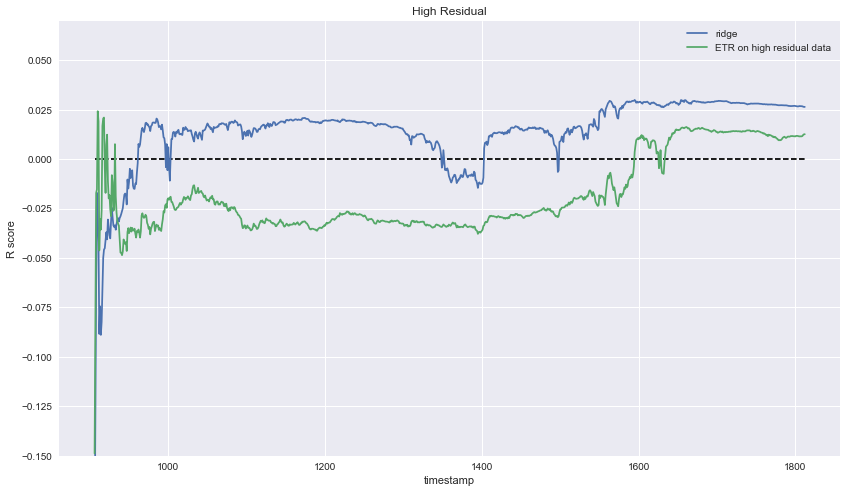

In [41]:
plt.title('High Residual')
plt.xlabel('timestamp')
plt.ylabel('R score')
plt.plot([min_stamp, max_stamp], [0, 0], 'k--')
plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_ri), label='ridge')
plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_bad), label='ETR on high residual data')
# plt.plot(range(min_stamp, max_stamp + 1), np.array(reward_com), label='combined')
plt.legend(loc='best')
plt.ylim(-0.15, 0.07)

In [39]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'